# Analisi Femminicidi in Italia dal 2012 al 2016

## Motivazioni
- **Perché abbiamo deciso di intraprendere questo progetto?**
  - Vogliamo fornire dati concreti che possano essere utili per sviluppare politiche di prevenzione e intervento più efficaci.
- **Cosa ci ha spinto ad interessarci a questo argomento?**
  - Un interesse personale per la giustizia sociale.

## Domande di Ricerca
- Come sono distribuiti i casi di femminicidio in Italia nel tempo?
- Come vengono trattate nei procedimenti giudiziari?
- Quali sono i luoghi più frequenti?
- Quali sono le modalità più frequenti utilizzate nei femminicidi?
- Relazioni tra Vittime e Assassini

# Descrizione dei Dati
- **Quali dati sono stati usati?**
    - Il dataset comprende le sentenze di femminicidio dal 2012 al 2016.
- **Che tipo di dati contiene?**
    - Anno dell'omicidio, modalità dell'omicidio, luogo dell'omicidio, relazione tra autore e vittima.
- **Chi ha creato il dataset?**
    - Il dataset è stato autoprodotto usando dati del Ministero della Giustizia a cura di Fabio Bartolomeo, Direttore generale di statistica al Ministero della giustizia e referente dell'Italia.
- **Quando è stato creato il dataset?**
    - Il dataset è stato creato fine giugno 2024
- **È disponibile online?**
    - E' disponibile online il file dal quale ho estratto i dati [qui](https://www.istat.it/it/files/2018/04/Analisi-delle-sentenze-di-Femminicidio-Ministero-di-Giustizia.pdf).


## Limiti dei Dati
- **Completezza dei Dati:**
  - I dati disponibili potrebbero non coprire tutti i casi di omicidio e femminicidio in Italia, specialmente quelli non denunciati o non registrati correttamente.
- **Tempistica:**
  - Alcuni dati potrebbero non essere aggiornati o riflettere ritardi nella raccolta e registrazione delle informazioni.
- **Dettagli Insufficienti:**
  - I dataset mancano di dettagli importanti, come informazioni più specifiche sulle motivazioni e le circostanze degli omicidi.


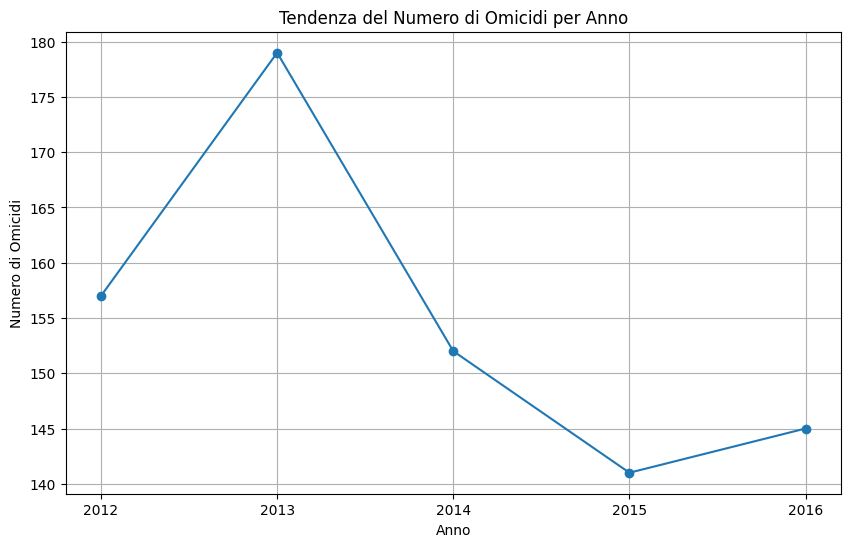

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel('femminicidi_anno.xlsx')

# Tendenza temporale
plt.figure(figsize=(10, 6))
plt.plot(data['Anno'], data['Numero di Omicidi'], marker='o')
plt.title('Tendenza del Numero di Omicidi per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Omicidi')
plt.xticks(data['Anno'])  # Imposta i tick solo agli anni interi
plt.grid(True)
plt.show()


# La variazione percentuale
La variazione percentuale esprime il cambiamento del numero di omicidi rispetto all'anno precedente in termini percentuali.

In [2]:
import pandas as pd

data['Variazione Percentuale'] = data['Numero di Omicidi'].pct_change() * 100
# Arrotondo alla 2a cifra decimale
data['Variazione Percentuale'] = data['Variazione Percentuale'].round(2)

# Sostituisco NaN con 0 nella colonna 'Variazione Percentuale'
data['Variazione Percentuale'] = data['Variazione Percentuale'].fillna(0)
print(data)


   Anno  Numero di Omicidi  Variazione Percentuale
0  2012                157                    0.00
1  2013                179                   14.01
2  2014                152                  -15.08
3  2015                141                   -7.24
4  2016                145                    2.84


## Media annuale

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('femminicidi_anno.xlsx')
media_annuale = data['Numero di Omicidi'].mean()

somma_omicidi = data['Numero di Omicidi'].sum()
print(f"La somma di tutti omicidi è: {somma_omicidi}")

print(f"La media nel periodo analizzato è di {media_annuale:.1f} omicidi.")


La somma di tutti omicidi è: 774
La media nel periodo analizzato è di 154.8 omicidi.


# Casi Portati a Giudizio

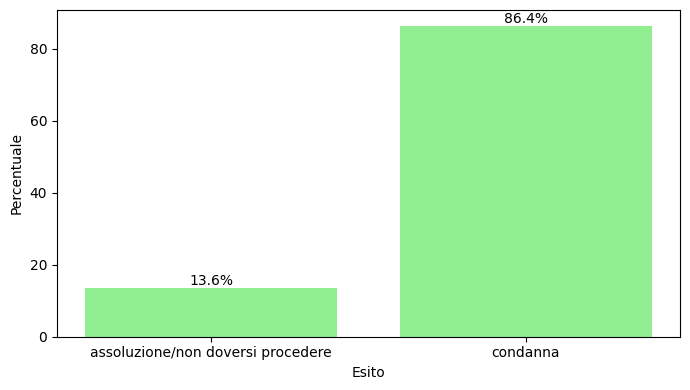

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

casi_df = pd.read_excel('CASI.xlsx')
esito_labels = casi_df['Esito']
esito_percentuali = casi_df['Percentuale']
plt.figure(figsize=(7, 4))
bars = plt.bar(esito_labels, esito_percentuali, color='lightgreen')

#percetuale
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', ha='center', va='bottom')

plt.xlabel('Esito')
plt.ylabel('Percentuale')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



## Dettagli casi Assolti

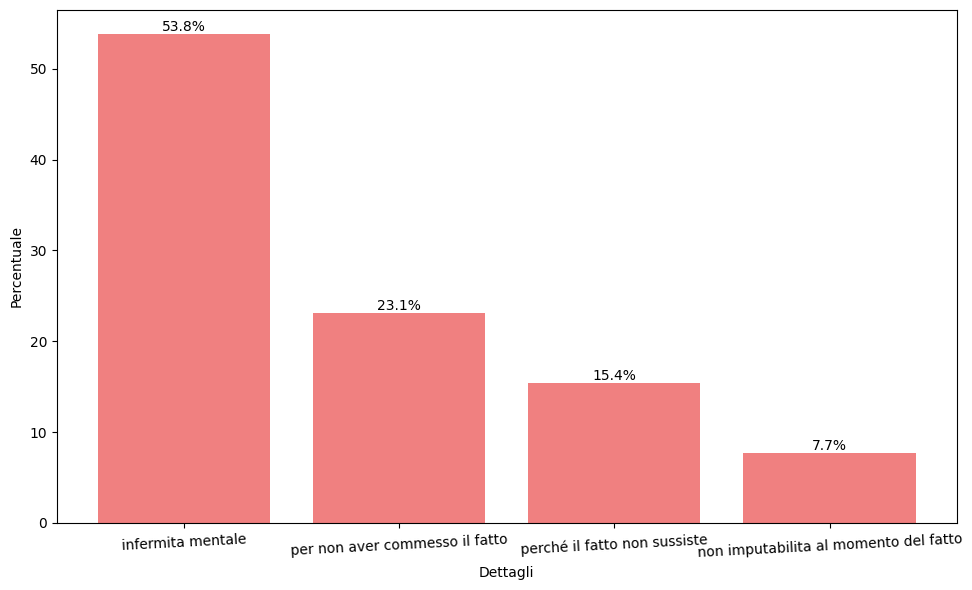

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
casi_assoluti_df = pd.read_excel('CASI_ASSOLUTI.xlsx')

dettagli_labels = casi_assoluti_df['Dettagli assoluzione']
dettagli_percentuali = casi_assoluti_df['Percentuale']

# Creo il grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(dettagli_labels, dettagli_percentuali, color='lightcoral')

# Percentuali
for bar, perc in zip(bars, dettagli_percentuali):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{perc:.1f}%', 
             ha='center', va='bottom')
plt.xlabel('Dettagli')
plt.ylabel('Percentuale')
plt.xticks(rotation=3)
plt.tight_layout()
plt.show()


## Dettagli dei casi condannati

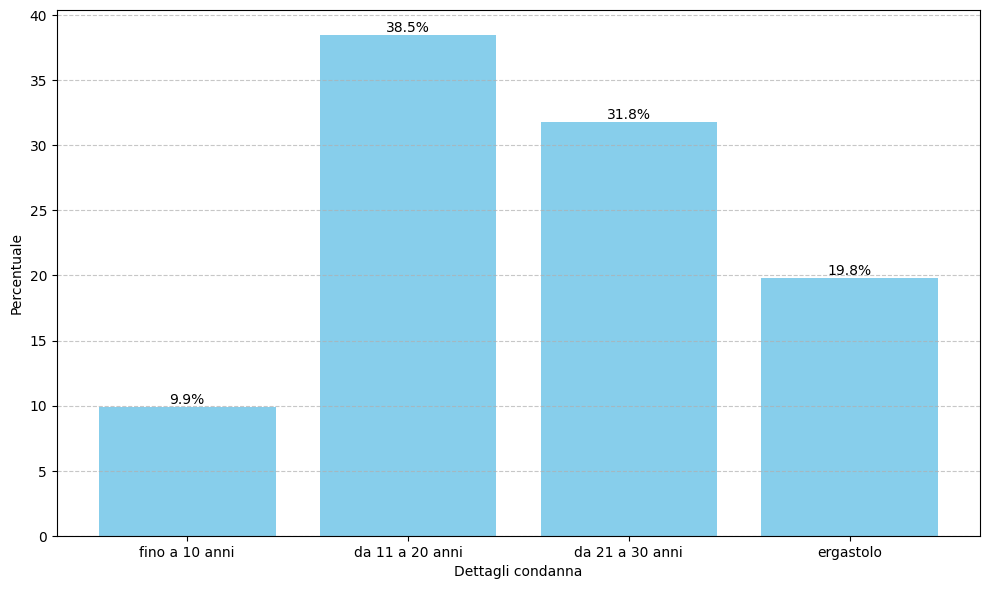

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('CASI_CONDANNATI.xlsx')

plt.figure(figsize=(10, 6))
bars = plt.bar(df['Dettagli condanna'], df['Percentuale'], color='skyblue')

# percentuali
for bar, perc in zip(bars, df['Percentuale']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{perc:.1f}%', 
             ha='center', va='bottom')

plt.xlabel('Dettagli condanna')
plt.ylabel('Percentuale')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Luoghi dei Femminicidi

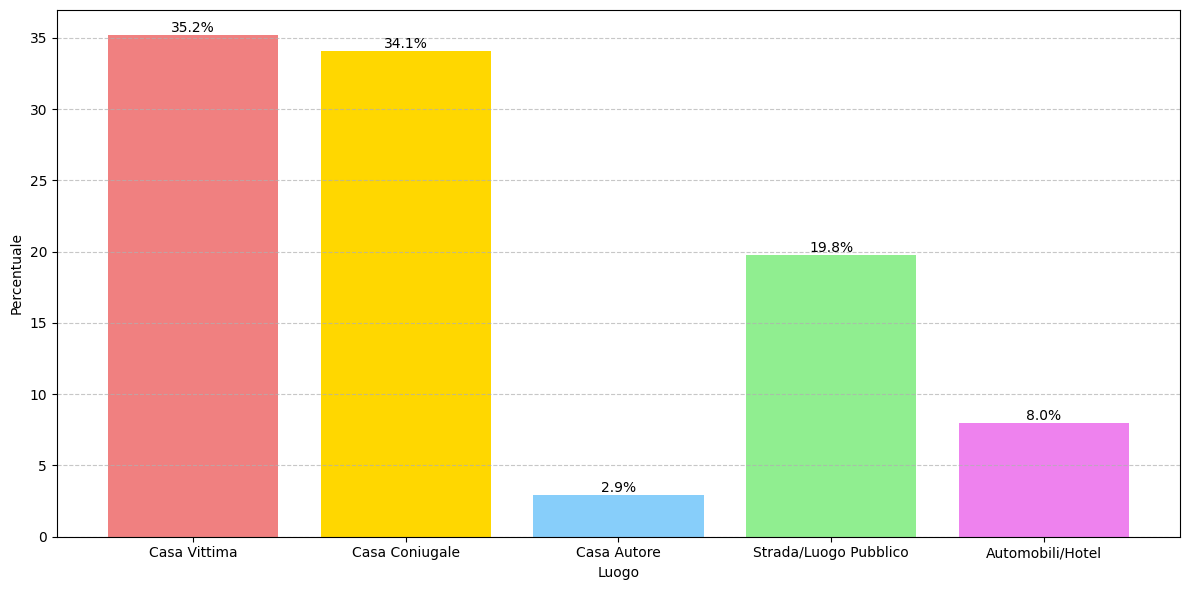

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df_luoghi = pd.read_excel('Luoghi.xlsx')
df_luoghi['Percentuale'] = df_luoghi['Percentuale'].str.replace('%', '').astype(float)

# colori diversi
colors = ['lightcoral', 'gold', 'lightskyblue', 'lightgreen', 'violet', 'orange', 'pink']

plt.figure(figsize=(12, 6))
bars = plt.bar(df_luoghi['Luogo'], df_luoghi['Percentuale'], color=colors[:len(df_luoghi)])

# Percentuali
for bar, perc in zip(bars, df_luoghi['Percentuale']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{perc:.1f}%', 
             ha='center', va='bottom')

plt.xlabel('Luogo')
plt.ylabel('Percentuale')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Modalità dei femminicidi

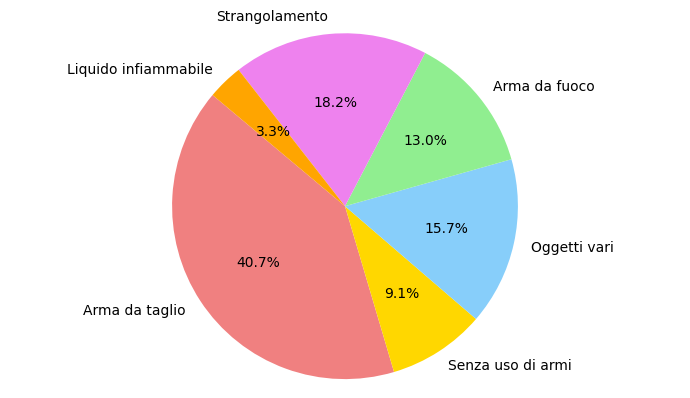

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_modalita = pd.read_excel('Modalita.xlsx')
df_modalita['Percentuale'] = df_modalita['Percentuale'].astype(float)

# Creo il grafico a torta
distinct_colors = ['lightcoral', 'gold', 'lightskyblue', 'lightgreen', 'violet', 'orange']

plt.figure(figsize=(7, 4))
plt.pie(df_modalita['Percentuale'], labels=df_modalita['Modalità'], autopct='%1.1f%%', colors=distinct_colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


# Relazioni Vittime/Assassini

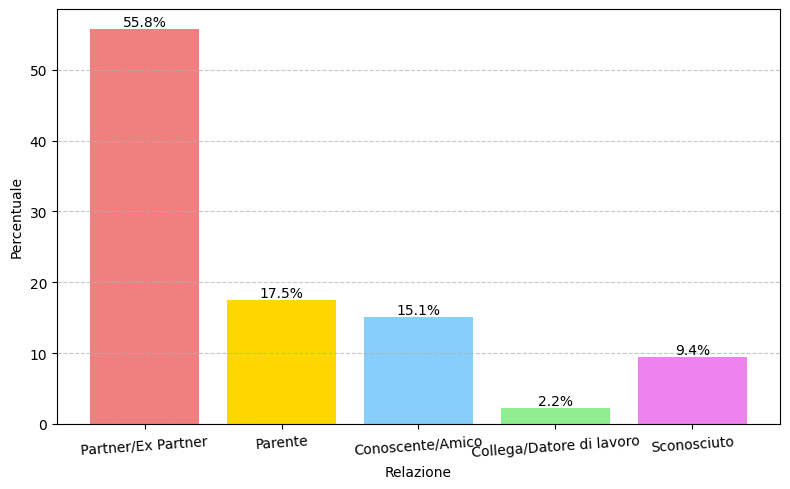

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file Excel
df_relazioni = pd.read_excel('Relazioni.xlsx')
df_relazioni['Percentuale'] = df_relazioni['Percentuale'].str.replace('%', '').astype(float)

# colori distinti
colors = ['lightcoral', 'gold', 'lightskyblue', 'lightgreen', 'violet']

plt.figure(figsize=(8, 5))
bars = plt.bar(df_relazioni['Relazione'], df_relazioni['Percentuale'], color=colors)
# percentuali esatte sopra ogni barra
for bar, perc in zip(bars, df_relazioni['Percentuale']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{perc:.1f}%',ha='center', va='bottom')

plt.xlabel('Relazione')
plt.ylabel('Percentuale')
plt.xticks(rotation=4, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Conclusioni

- Casi di femminicidio sempre presenti anche se in calo negli ultimi anni.
- In ambito giudiziario vengono puniti ma sono da considerare i casi assolti.
- I femminicidi avvengono al 69,3% nelle abitazioni private.
- Le modalità di esecuzione dei femminicidi sono brutali: uso di armi da taglio, strangolamento e oggetti pericolosi.
- In oltre la metà dei casi, tra l'autore del crimine e la vittima esiste una relazione sentimentale.


## Considerazioni

- Educazione e Sensibilizzazione
- Interventi Preventivi ragionando su una ricerca e raccolta dati approfondita